Predict the survivors from Titanic

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics 

Read the train.csv

In [65]:
data = pd.read_csv('/content/train.csv')
data.describe
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [0]:
data = data.drop(['Ticket', 'Cabin'], axis = 1)
data = data.dropna()


In [0]:
len(data.index)

712

Plot survived VS dead

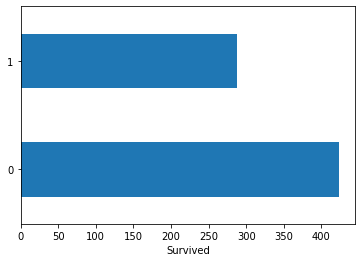

In [0]:
data.Survived.value_counts().plot(kind='barh')
plt.xlabel('Survived')
plt.show()

Plot female survived and dead

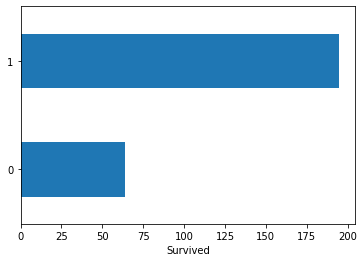

In [0]:
female = data.Survived[data.Sex == 'female'].value_counts().sort_index()
female.plot(kind='barh')
plt.xlabel('Survived')
plt.show()

Plot Male Survived VS Dead

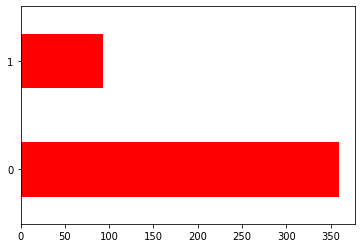

In [0]:
male = data.Survived[data.Sex == 'male'].value_counts().sort_index()
male.plot(kind='barh',label='Male', color='red')
plt.show()

Female survivors are greater then male.

Class level in high`class

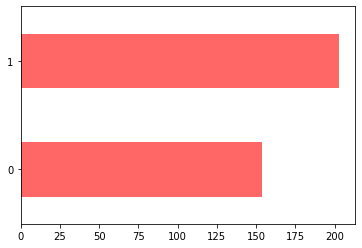

In [0]:
highclass = data.Survived[data.Pclass != 3].value_counts().sort_index()
highclass.plot(kind='barh',label='Highclass', color='red', alpha=0.6)
plt.show()

Class level in low class

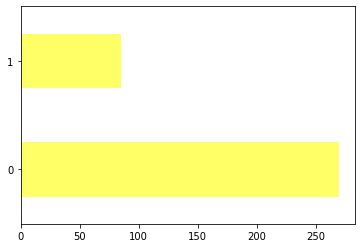

In [0]:
lowclass = data.Survived[data.Pclass == 3].value_counts().sort_index()
lowclass.plot(kind='barh',label='Highclass', color='Yellow', alpha=0.6)
plt.show()

Passengers in high class are more likely to survive

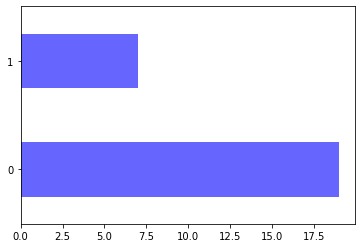

In [95]:
Elder = data.Survived[data.Age>=60 ].value_counts().sort_index()
Elder.plot(kind='barh', color='blue', alpha=0.6)
plt.show()

Passanger older than 60 are less likely to survive

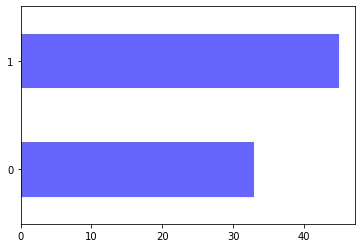

In [94]:
Young = data.Survived[data.Age<15 ].value_counts().sort_index()
Young.plot(kind='barh', color='blue', alpha=0.6)
plt.show()

Passengers younger than 15 are more likely to survive

Embark locations  

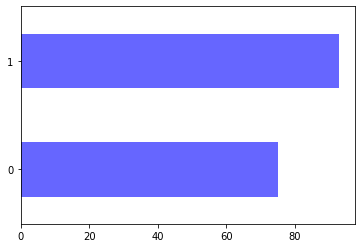

In [72]:
EmbarkedC = data.Survived[data.Embarked=='C' ].value_counts().sort_index()
EmbarkedC.plot(kind='barh',label='C', color='blue', alpha=0.6)
plt.show()

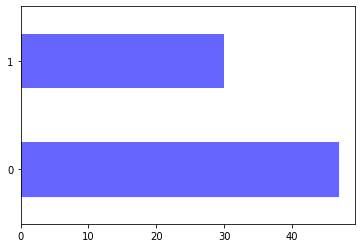

In [73]:
EmbarkedQ = data.Survived[data.Embarked=='Q' ].value_counts().sort_index()
EmbarkedQ .plot(kind='barh',label='Q', color='blue', alpha=0.6)
plt.show()

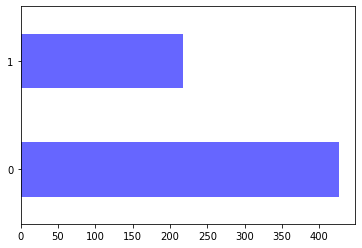

In [74]:
EmbarkedS = data.Survived[data.Embarked=='S' ].value_counts().sort_index()
EmbarkedS.plot(kind='barh',label='S', color='blue', alpha=0.6)
plt.show()

Passangers with embarked label C are more likely to survivre S & Q

Plass, Sex, Age and Embarked are related to a passenger's survive.

In [62]:
y, X = dmatrices('Survived~ C(Pclass) + C(Sex) + Age + C(Embarked)', data = data, return_type='dataframe')
y = np.ravel(y)
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
model.score(X, y)

0.7935393258426966

In [98]:
1-y.mean()
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[-0.0012011677644107924]
1,C(Pclass)[T.2],[-0.9541388024267861]
2,C(Pclass)[T.3],[-2.1804730653498545]
3,C(Sex)[T.male],[-2.3752891614403198]
4,C(Embarked)[T.Q],[-0.6390592683909245]
5,C(Embarked)[T.S],[-0.47926880397213645]
6,Age,[-0.03314300131730369]


In [0]:
test_data = pd.read_csv('/content/test.csv')
test_data['Survived'] = 1
test_data.loc[np.isnan(test_data.Age), 'Age'] = np.mean(data['Age'])
ytest, Xtest = dmatrices('Survived~ C(Pclass) + C(Sex) + Age + C(Embarked)', data = test_data, return_type='dataframe')
pred = model.predict(Xtest).astype(int)
solution = pd.DataFrame(list(zip(test_data['PassengerId'], pred)), columns=['PassengerID', 'Survived'])
solution.to_csv('/content/my_prediction.csv', index = False)